# Context

In [71]:
import pandas as pd
import numpy as np
import math
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data quality assessment

In [72]:
d_filepath = "C:/Users/irin3/Downloads/train.csv"
d = pd.read_csv(d_filepath, index_col="PassengerId")
d.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data exploration

In [73]:
d.shape

(100000, 11)

In [74]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [75]:
d.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [76]:
d.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
#survived women
women = d.loc[d.Sex == 'female']['Survived']
pct_women = sum(women)/len(women)
print('% survived women:', pct_women)

#survived men
men = d.loc[d.Sex == 'male']['Survived']
pct_men = sum(men)/len(men)
print('% survived men:', pct_men)

% survived women: 0.7115253155903933
% survived men: 0.20579534519014864


In [78]:
Pclass = d.groupby(['Pclass']).mean()
Pclass['Survived'].head()

Pclass
1    0.579779
2    0.525018
3    0.247305
Name: Survived, dtype: float64

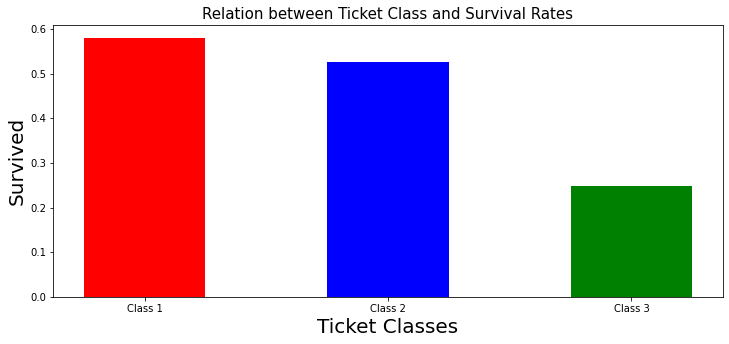

In [79]:
a = ['Class 1','Class 2','Class 3']
plclsses = [Pclass['Survived'].head().values[0],Pclass['Survived'].head().values[1],Pclass['Survived'].head().values[2]]
  
x_axis = np.arange(len(a))
f, ax = plt.subplots(figsize=(12, 5))
plt.bar(x_axis, plclsses, 0.5, color=['red', 'blue', 'green'])
  
plt.xticks(x_axis, a)
plt.xlabel("Ticket Classes", fontsize=20)
plt.ylabel("Survived", fontsize=20)
plt.title("Relation between Ticket Class and Survival Rates", fontsize=15)
plt.show()

In [80]:
Gender = d.groupby(['Sex']).mean()
Gender['Survived'].head()

Sex
female    0.711525
male      0.205795
Name: Survived, dtype: float64

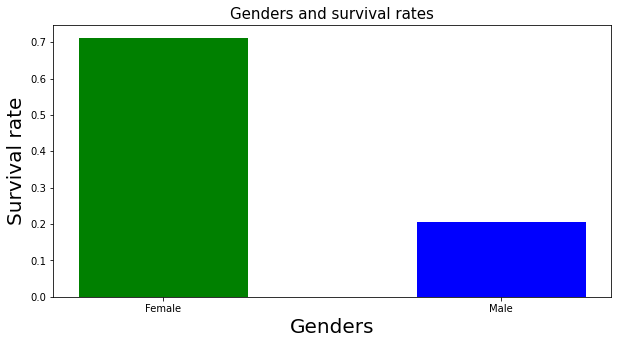

In [81]:
b = ['Female','Male']
pltclsses = [Gender['Survived'].head().values[0],Gender['Survived'].head().values[1]]
  
x_axis = np.arange(len(b))
f, ax = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, pltclsses, 0.5, color=['green', 'blue'])  
plt.xticks(x_axis, b)
plt.xlabel("Genders", fontsize=20)
plt.ylabel("Survival rate", fontsize=20)
plt.title("Genders and survival rates", fontsize=15)
plt.show()

In [82]:
d['AgeCategory'] = pd.cut(d['Age'], 8, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '70-80', '80-90'])
Age = d.groupby(['Age']).mean()
Age['Survived'].head(8)

Age
0.08    0.410256
0.17    0.358209
0.25    0.338235
0.33    0.396226
0.42    0.387097
0.50    0.258621
0.58    0.403226
0.67    0.387097
Name: Survived, dtype: float64

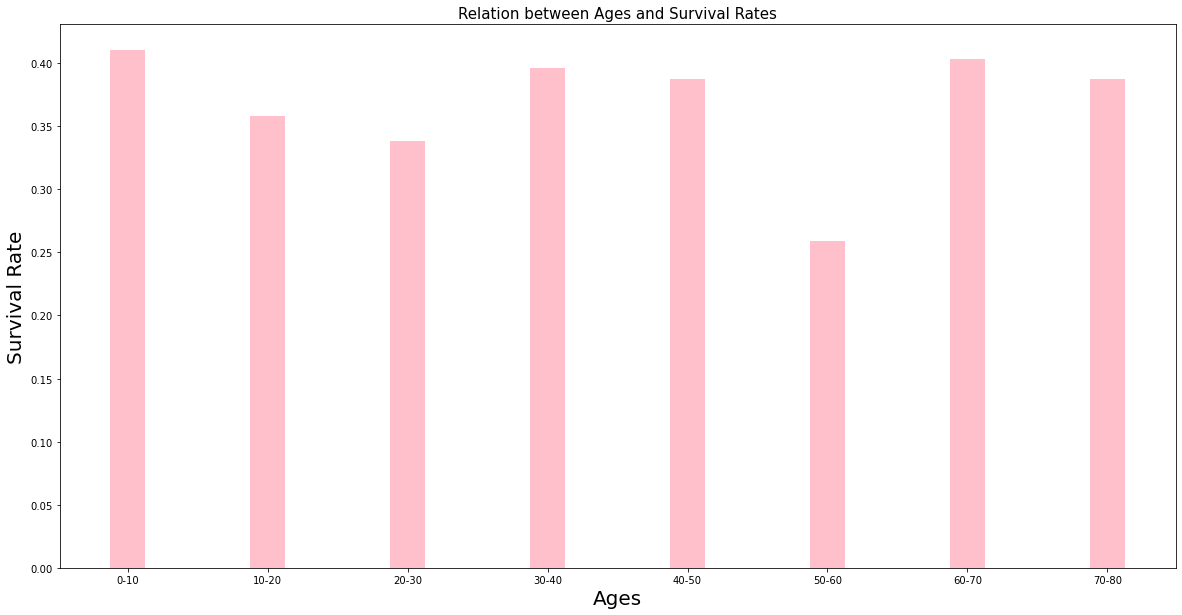

In [83]:
a = ['0-10','10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
pltclsses = [Age['Survived'].head(8).values[0], Age['Survived'].head(8).values[1], Age['Survived'].head(8).values[2], Age['Survived'].head(8).values[3],
             Age['Survived'].head(8).values[4], Age['Survived'].head(8).values[5], Age['Survived'].head(8).values[6], Age['Survived'].head(8).values[7]]
  
x_axis = np.arange(len(a))
f, ax = plt.subplots(figsize=(20, 10))
plt.bar(x_axis, pltclsses, 0.25, color='pink')
  
plt.xticks(x_axis, a)
plt.xlabel("Ages", fontsize=20)
plt.ylabel("Survival Rate", fontsize=20)
plt.title("Relation between Ages and Survival Rates", fontsize=15)
plt.show()

In [84]:
d.isnull().sum()
d.count()

Survived       100000
Pclass         100000
Name           100000
Sex            100000
Age             96708
SibSp          100000
Parch          100000
Ticket          95377
Fare            99866
Cabin           32134
Embarked        99750
AgeCategory     96708
dtype: int64

In [85]:
d.isnull().sum()
d.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,NaN
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,0-10
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,10-20
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,20-30


# Summary

<AxesSubplot:>

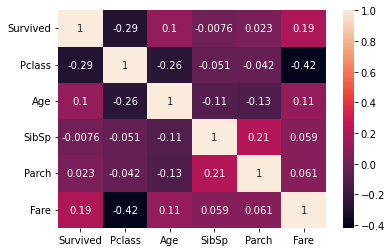

In [86]:
sns.heatmap(d.corr(), annot=True)